### Student Performance Analysis and Visualizations

## Table of Contents
Descriptive Statistics
Inferential Statistics
Grouping Operations
Data Visualizations
Label Encoding
Data Preparation
Modelling
Logistic Regression **bold text**

In [ ]:
!pip install dabl

In [ ]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import dabl



In [ ]:
# for providing path
import os
out = os.path.basename("/content/StudentsPerformance (1).csv")
print(out)

StudentsPerformance (1).csv


In [ ]:
# reading the data
data = pd.read_csv('/content/StudentsPerformance (1).csv')



In [ ]:
# getting the shape of the data
print(data.shape)

(1000, 8)


In [ ]:
# looking at the head of the data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# describing the dataset

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# lets check the no. of unique items present in the categorical column

data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [ ]:
# lets check the percentage of missing data in each columns present in the data

no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e1da2250>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e1ce2490>,
       dtype=object)]

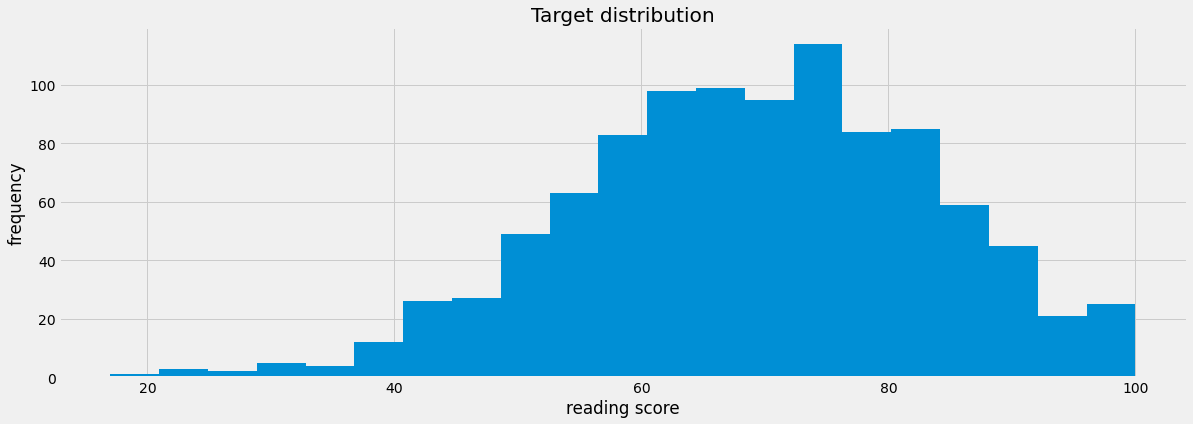

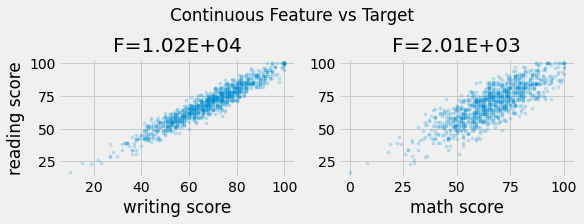

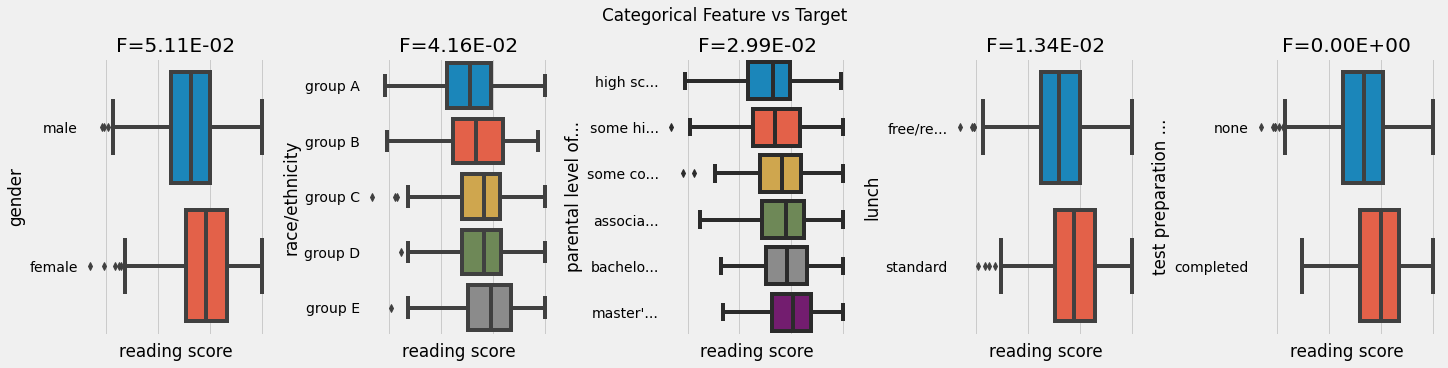

In [ ]:
# comparison of all other attributes with respect to Reading Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ddbb46d0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ddb96d90>,
       dtype=object)]

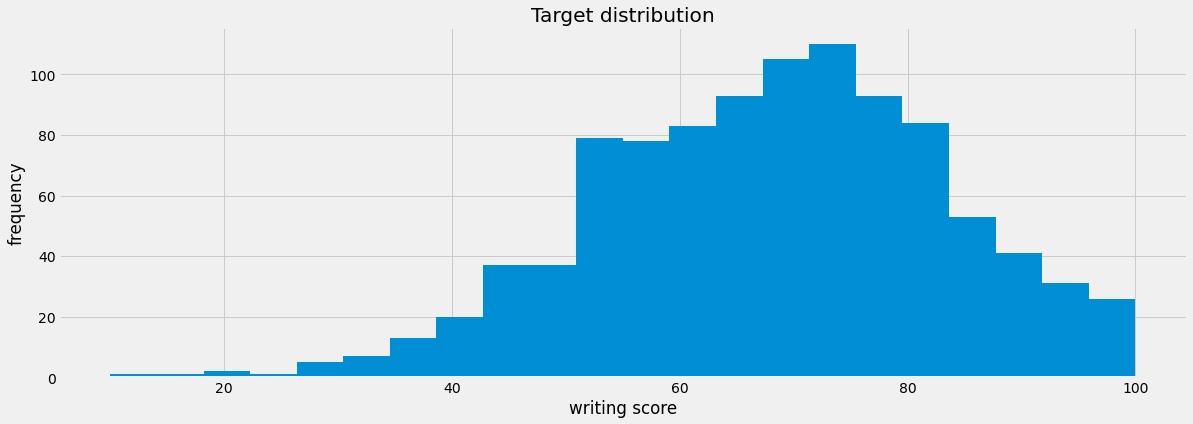

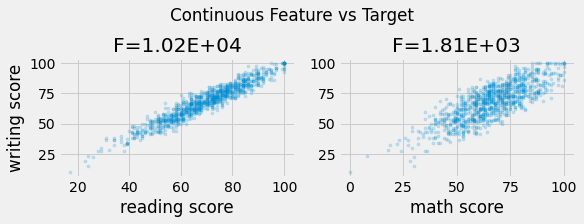

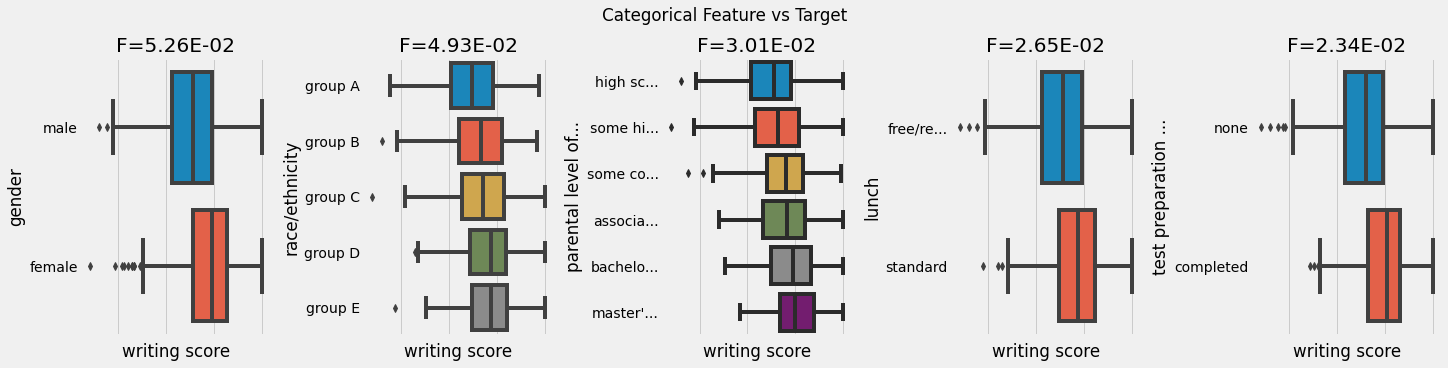

In [ ]:
# comparison of all other attributes with respect to Writing Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'writing score')

# Inferential Statistics

Lets check the Probability of Students Scoring More than 50 Marks in **Maths**

In [ ]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [ ]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [ ]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


Lets also check the Probability of Students Passing in all the three **Subjects**

In [ ]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) & 
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


Lets also check the Probability of Students Scoring more than 90 in all the three **Subjects**

In [ ]:
total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) &
                                                  (data['writing score'] > 90) & 
                                                  (data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


Checking for Skewness for the Maths, Reading and Writing **Scores**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

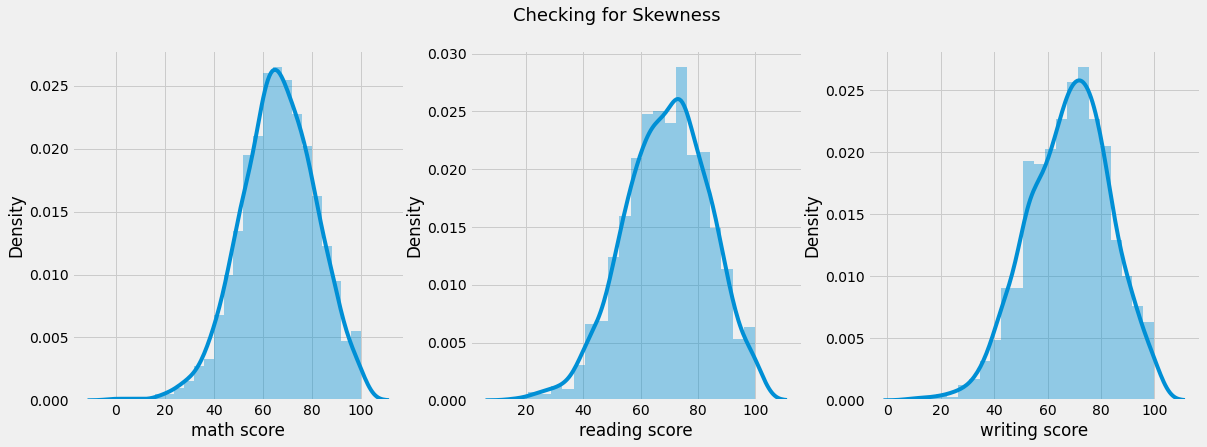

In [ ]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

Lets check the **Inference**

In [ ]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= data['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", data['math score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= data['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", data['reading score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= data['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


Let check the Confidence Interval for Math **Score**

In [ ]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['math score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


Let check the Confidence Interval for Reading **Score**

In [ ]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['reading score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


Let check the Confidence Interval for Writing **Score**

In [ ]:
# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['writing score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (66.80960035030861, 68.39039964969137)
True mean: 68.054


Notice that the true mean is contained in our interval.
A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true *mean*

# Grouping Operations

Number of Girl Students Scoring 90 in all the **Subjects**

In [ ]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


Lets compare the scores secured by Boys and **Girls**

In [ ]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0   65.0  100            17   73.0  100            10   74.0   
male           27   69.0  100            23   66.0  100            15   64.0   

             
        max  
gender       
female  100  
male    100

Lets check the Effect of Lunch on Student's **Performnce**

In [ ]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

Lets check the Effect of Test Preparation Course on **Scores**

In [ ]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

Lets check the Effect of Race and Ethnicity on Student's **Performance**

In [ ]:
data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


# Data Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


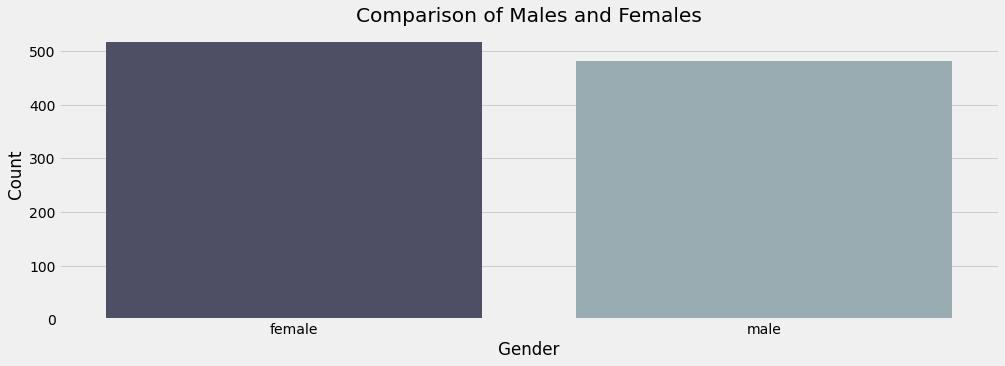

In [ ]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


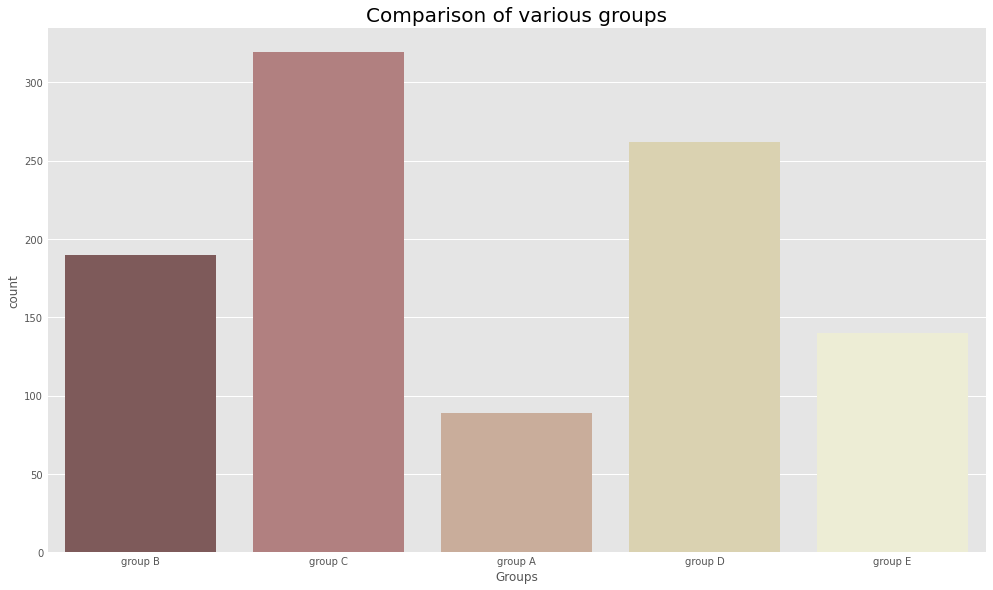

In [ ]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


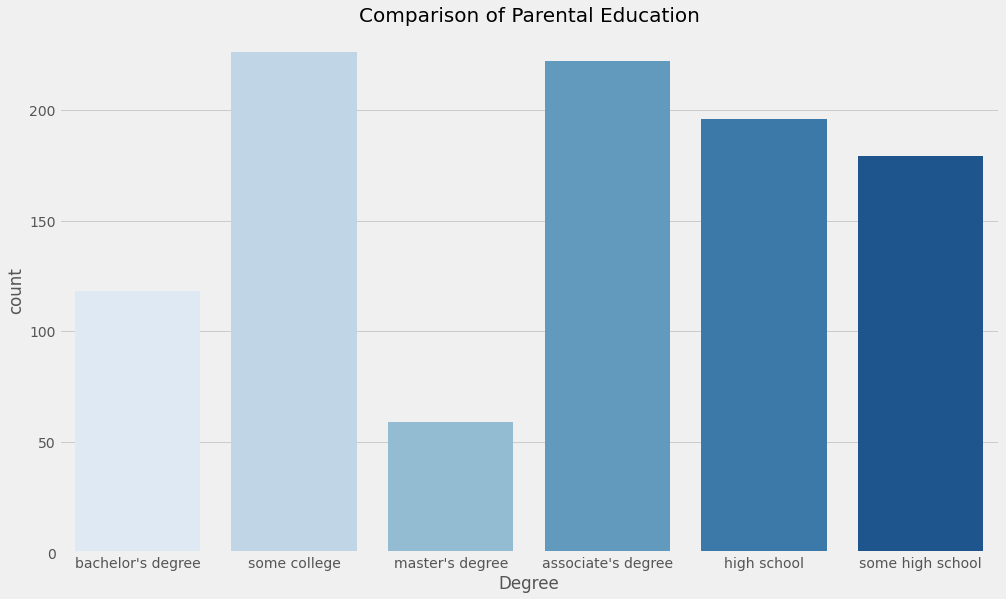

In [ ]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


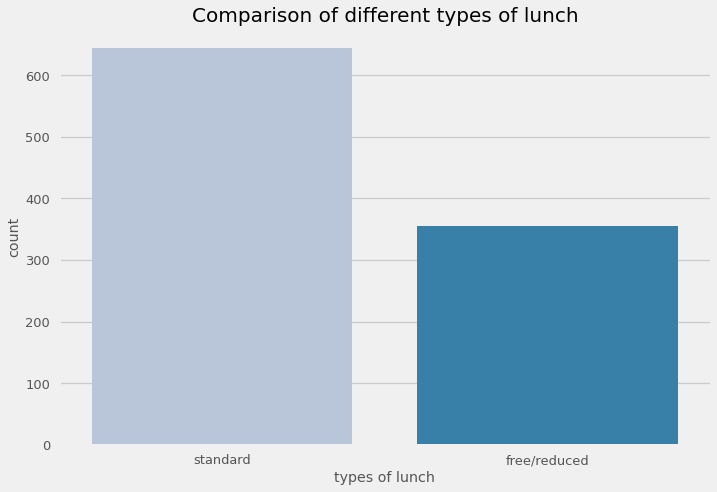

In [ ]:
# visualizing different types of lunch 

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


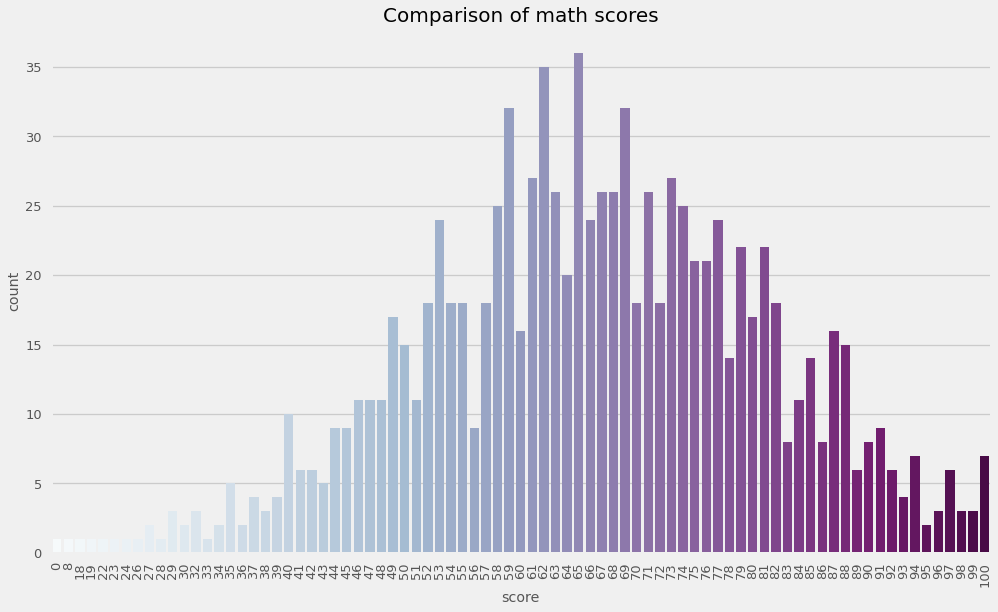

In [ ]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


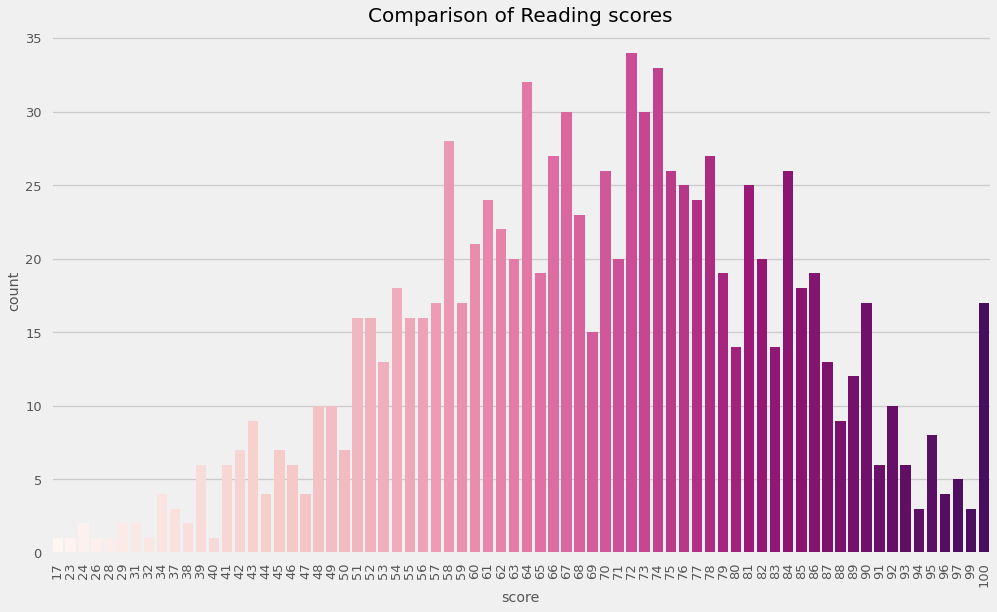

In [ ]:
## visualizing reading score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['reading score'], palette = 'RdPu')
plt.title('Comparison of Reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


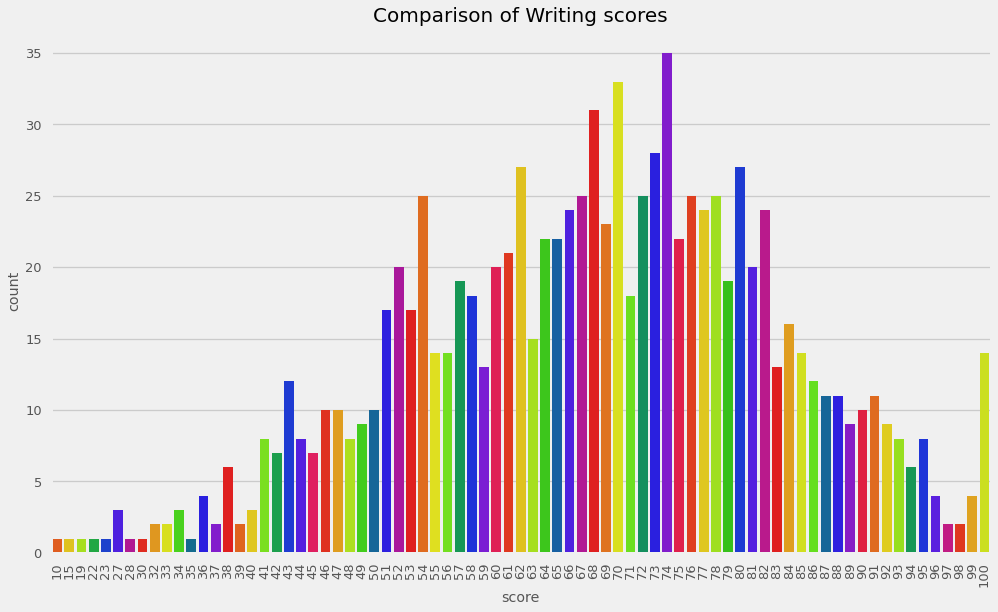

In [ ]:

# visualizing writing score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'], palette = 'prism')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

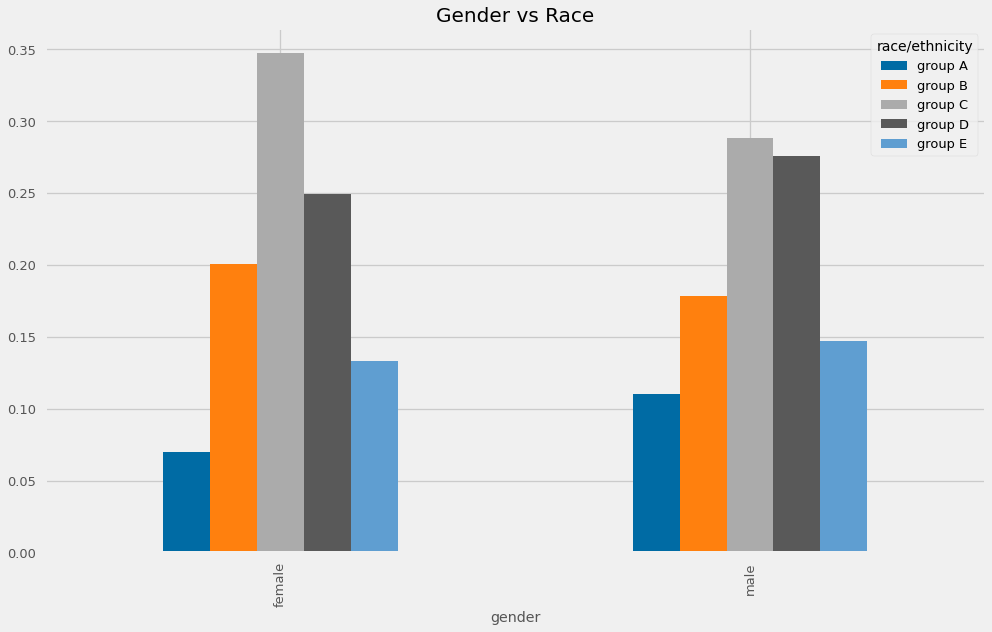

In [ ]:
# gender vs race/etnicity 

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

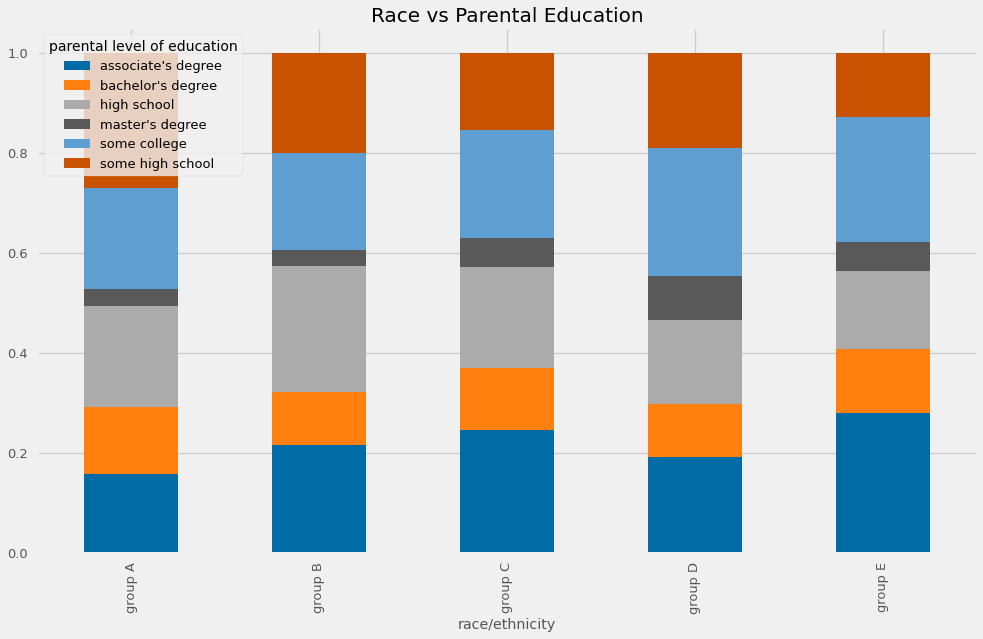

In [ ]:
# comparison of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

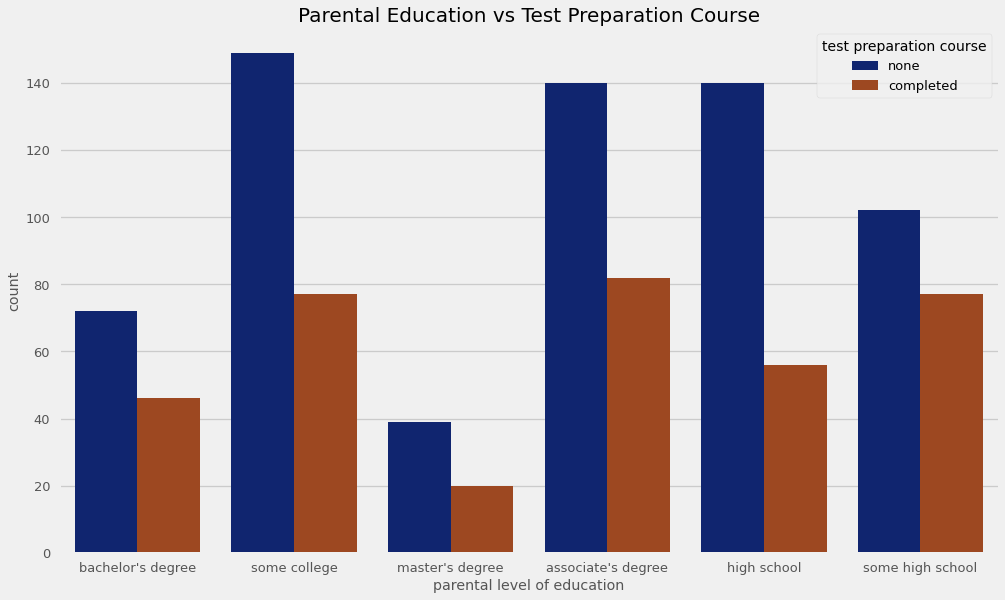

In [ ]:

# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

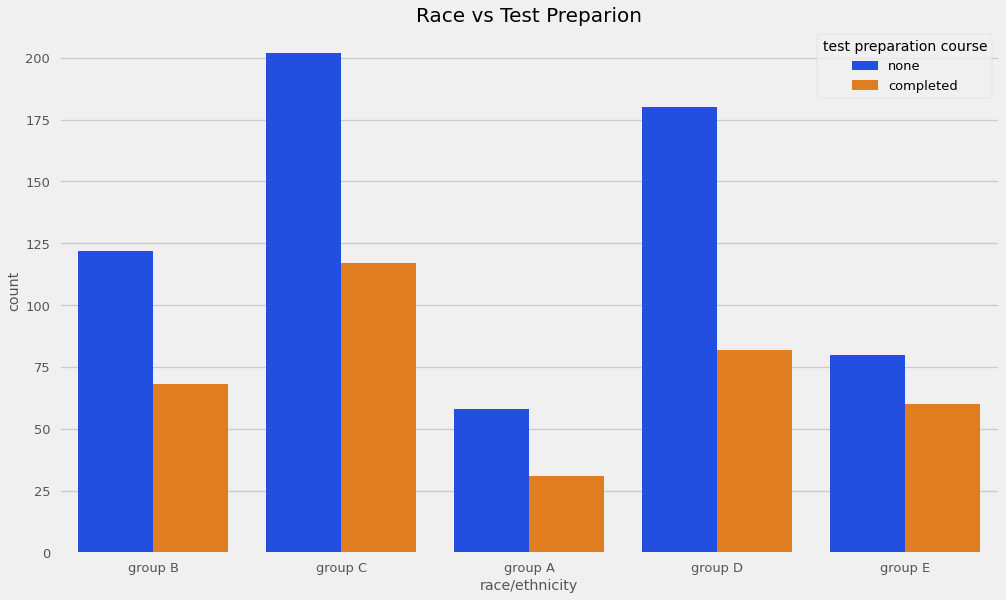

In [ ]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

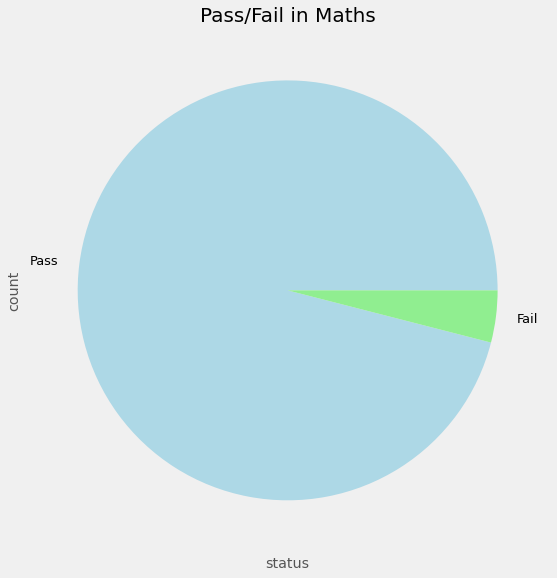

In [ ]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

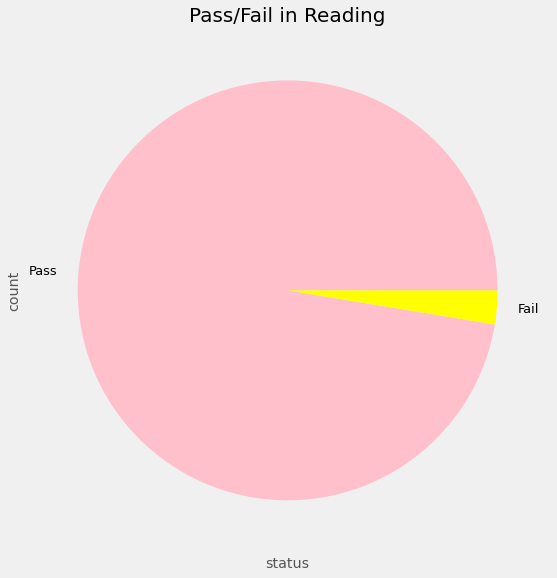

In [ ]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

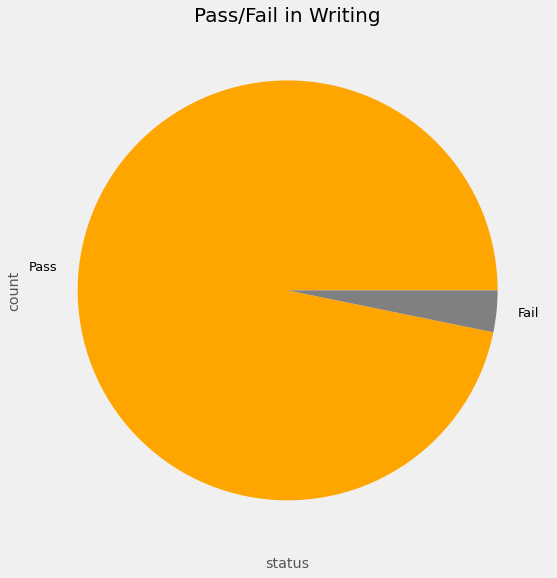

In [ ]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

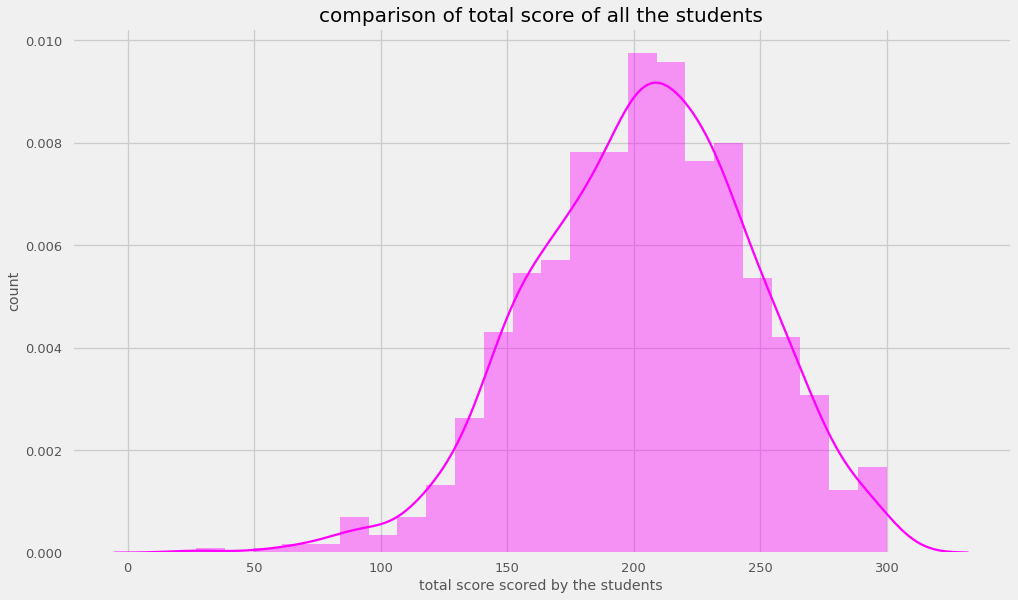

In [ ]:
# computing the total score for each student

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

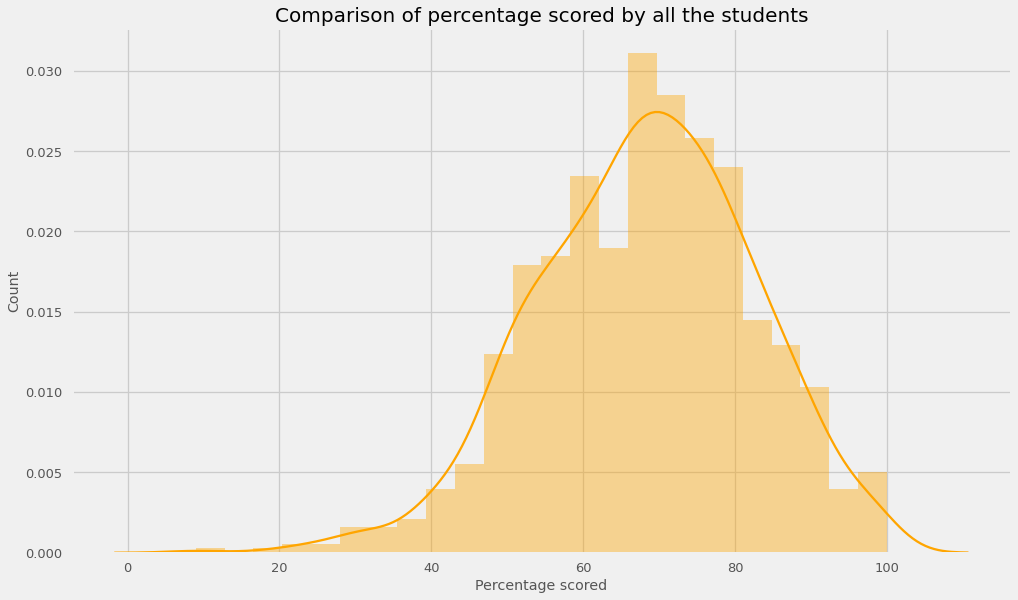

In [ ]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

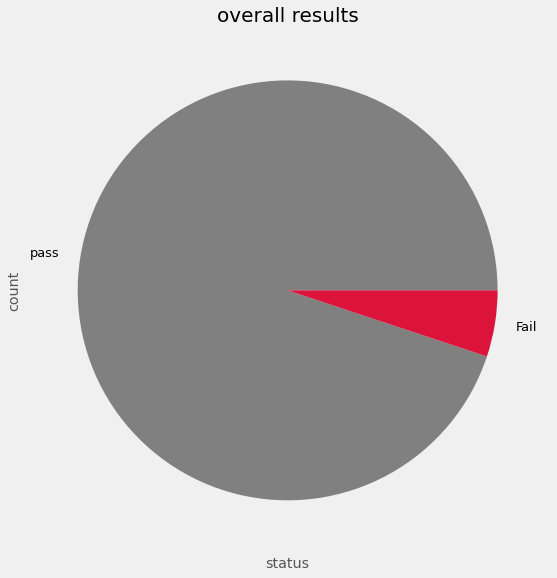

In [ ]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [ ]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

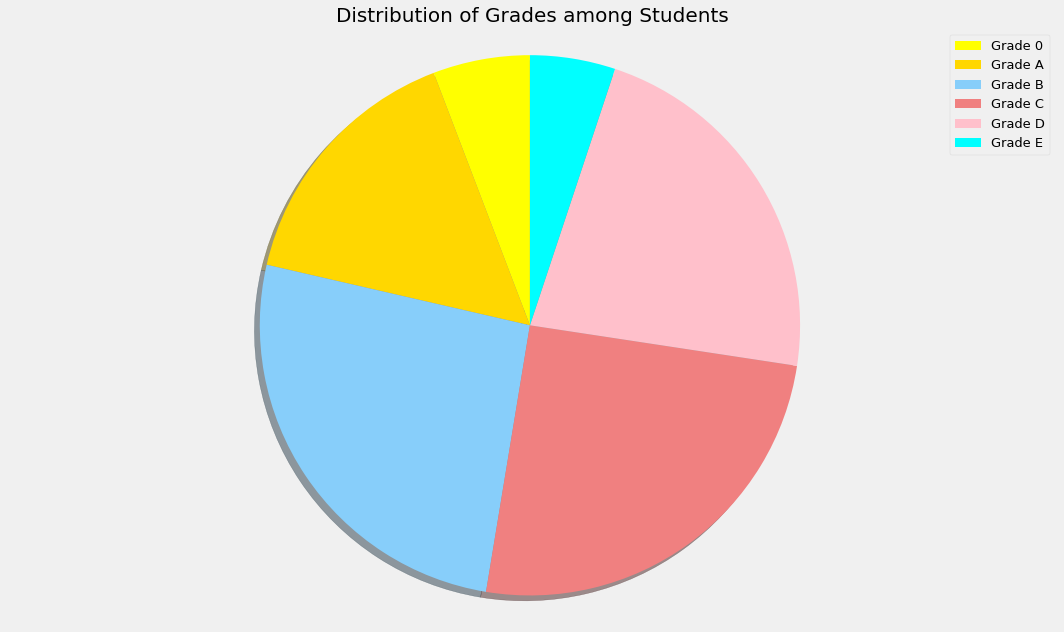

In [ ]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

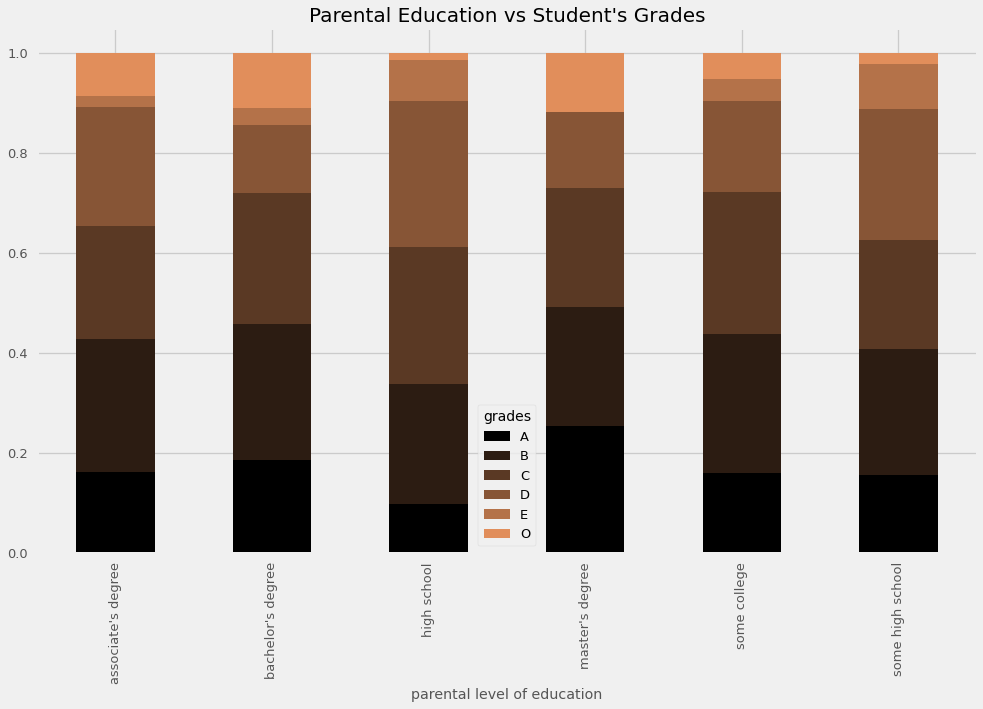

In [ ]:
# comparison parent's degree and their corresponding grades

plt.rcParams['figure.figsize'] = (15, 9)

x = pd.crosstab(data['parental level of education'], data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

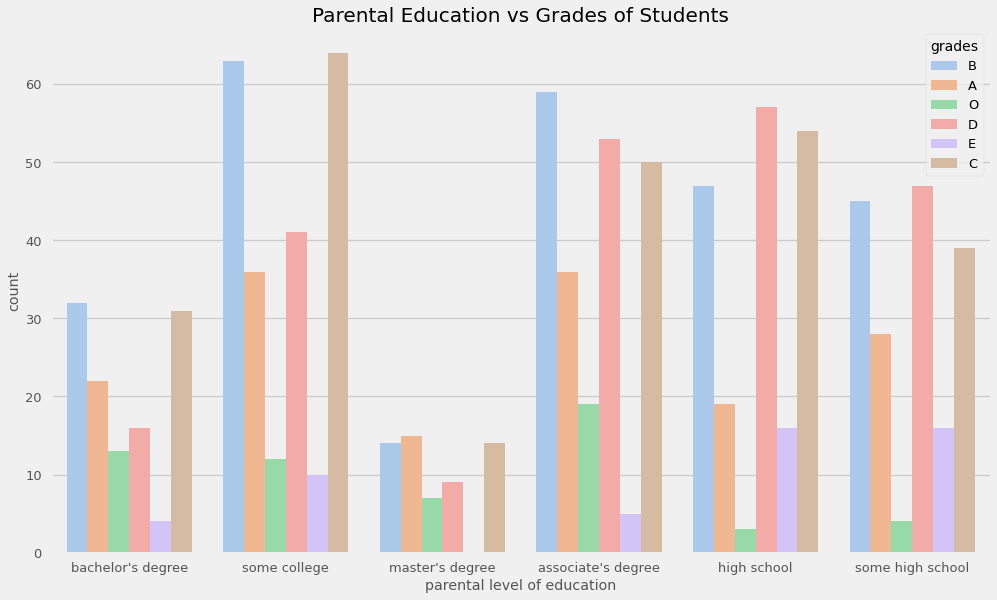

In [ ]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

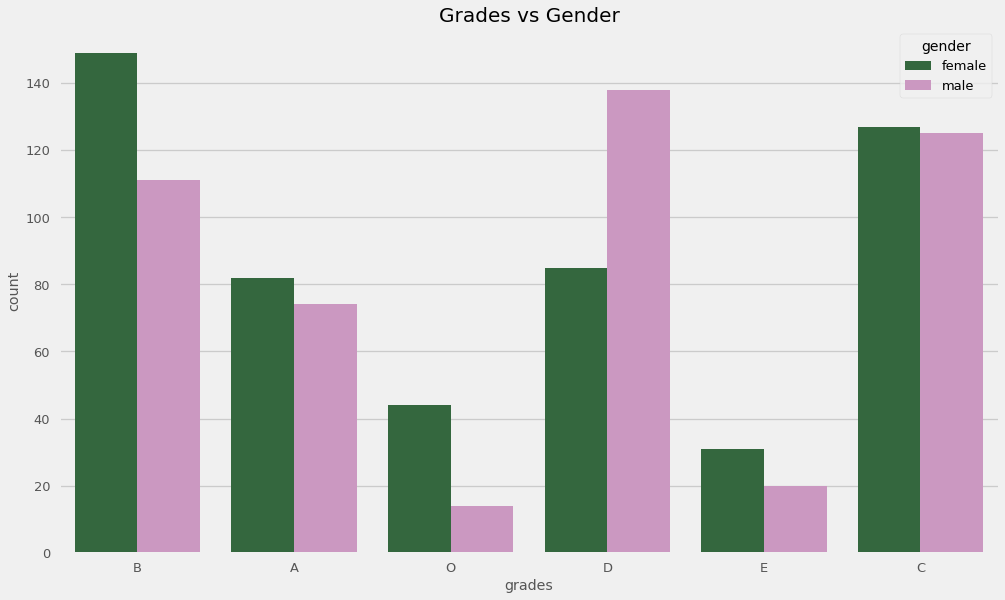

In [ ]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

# Data Preparation

In [ ]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [ ]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

## Modelling
## Logistic Regression

In [ ]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8506666666666667
Testing Accuracy : 0.816


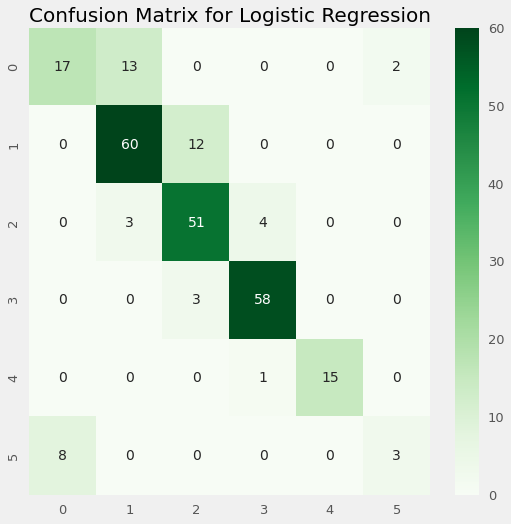

In [ ]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


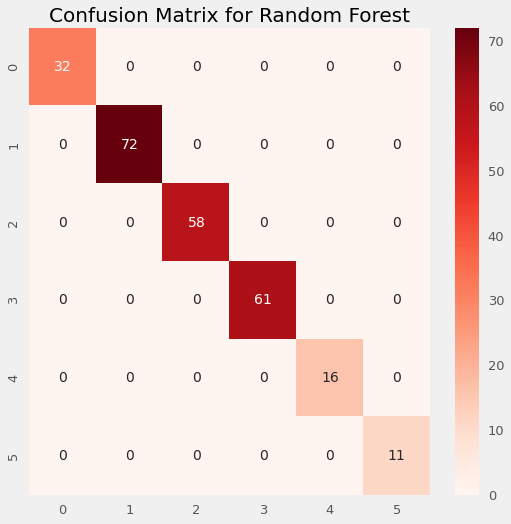

In [ ]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()


In [ ]:
!pip install yellowbrick

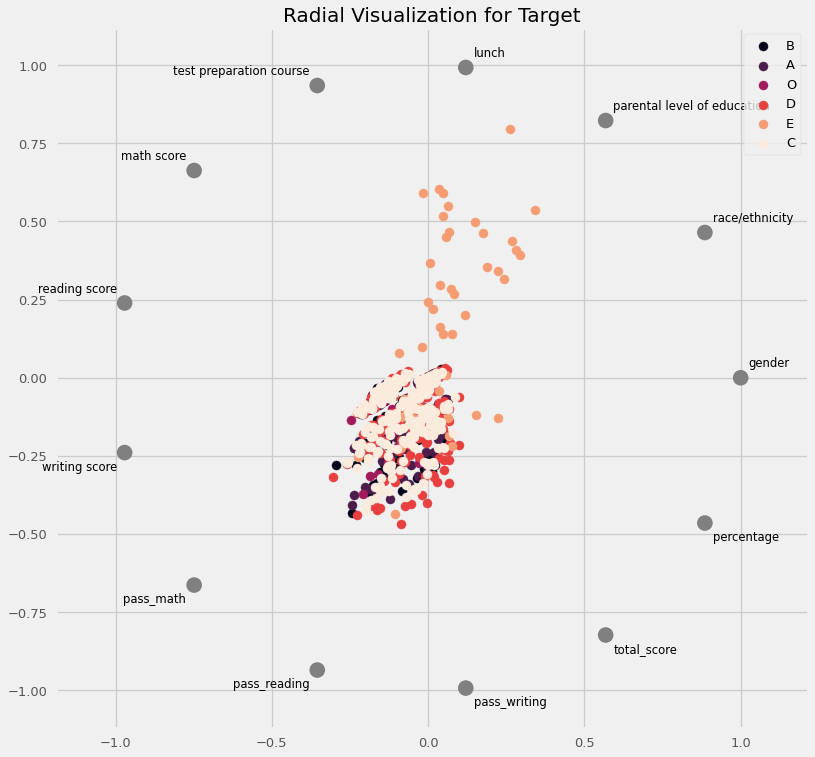

In [ ]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()